In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

#visualize decision trees
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [165]:
df = pd.read_csv('BankChurners.csv')

In [166]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [169]:
df.drop(df.columns[[-2, -1]], axis=1, inplace=True)
df.drop('CLIENTNUM', axis=1, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [171]:
df.isnull().any().all()

False

In [18]:
df_attrition_flag = pd.DataFrame(df['Attrition_Flag'].value_counts(normalize=True))
df_attrition_flag

,Attrition_Flag
Existing Customer,0.83934
Attrited Customer,0.16066


In [19]:
df_gender = pd.DataFrame(df['Gender'].value_counts(normalize=True))
df_gender

,Gender
F,0.529081
M,0.470919


In [20]:
df_education_level = pd.DataFrame(df['Education_Level'].value_counts(normalize=True))
df_education_level

,Education_Level
Graduate,0.308877
High School,0.198776
Unknown,0.149995
Uneducated,0.146835
College,0.100030
Post-Graduate,0.050953
Doctorate,0.044534


In [21]:
df_marital_status = pd.DataFrame(df['Marital_Status'].value_counts(normalize=True))
df_marital_status

,Marital_Status
Married,0.462822
Single,0.389355
Unknown,0.073961
Divorced,0.073862


In [22]:
df_income_category = pd.DataFrame(df['Income_Category'].value_counts(normalize=True))
df_income_category

,Income_Category
Less than $40K,0.351634
$40K - $60K,0.176755
$80K - $120K,0.151575
$60K - $80K,0.138442
Unknown,0.109805
$120K +,0.071788


In [23]:
df_card_category = pd.DataFrame(df['Card_Category'].value_counts(normalize=True))
df_card_category

,Card_Category
Blue,0.931767
Silver,0.054804
Gold,0.011455
Platinum,0.001975


In [172]:
y = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
fields = list(df.columns[1:])  
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Revolving_Bal        -0.263053
Avg_Utilization_Ratio      -0.178410
Total_Trans_Amt            -0.168598
Total_Relationship_Count   -0.150005
Total_Amt_Chng_Q4_Q1       -0.131063
Credit_Limit               -0.023873
Avg_Open_To_Buy            -0.000285
Months_on_book              0.013687
Customer_Age                0.018203
Dependent_count             0.018991
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
dtype: float64

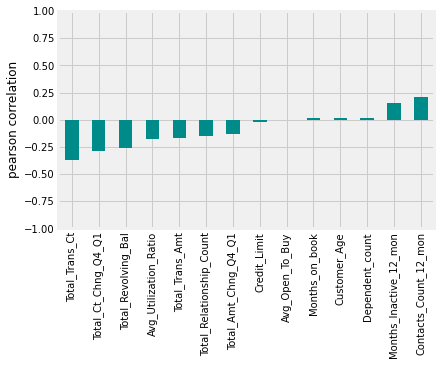

In [173]:
ax = correlations.plot(kind='bar', color='darkcyan')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [174]:
churn_status = ['not churned', 'churned']
not_churned_count = len(df[df['Attrition_Flag'] == 'Existing Customer'])
churned_count = len(df[df['Attrition_Flag'] == 'Attrited Customer'])

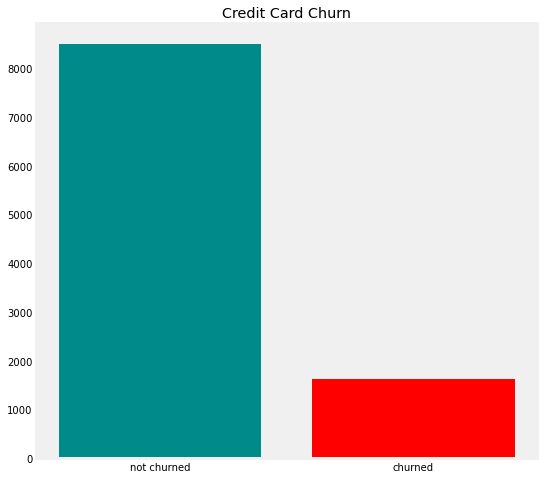

In [175]:
fig = plt.figure(figsize=(8,8))

plt.bar(churn_status, [not_churned_count, churned_count], label=churn_status, color=['darkcyan', 'red'])
plt.title('Credit Card Churn')
plt.grid(False)
plt.show()

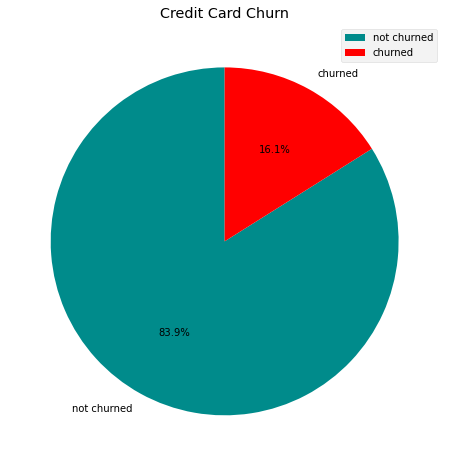

In [240]:
fig = plt.figure(figsize=(8,8))

plt.pie([not_churned_count, churned_count], labels=['not churned', 'churned'], colors=['darkcyan', 'red'], autopct='%1.1f%%', 
       startangle=90)
plt.legend()
plt.title('Credit Card Churn')
plt.show()

In [177]:
df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

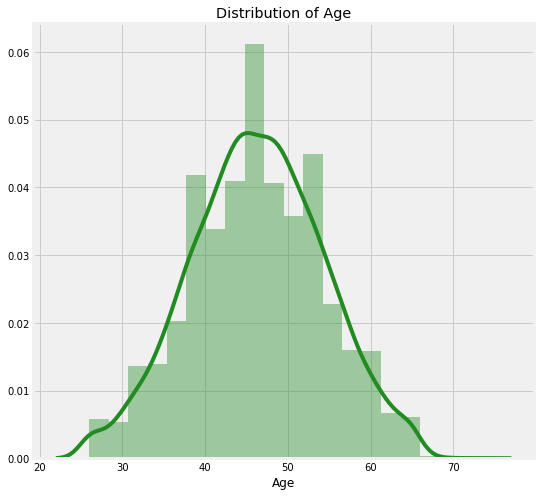

In [178]:
fig = plt.figure(figsize=(8,8))

sns.distplot(df['Customer_Age'], color='forestgreen', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

In [179]:
df['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

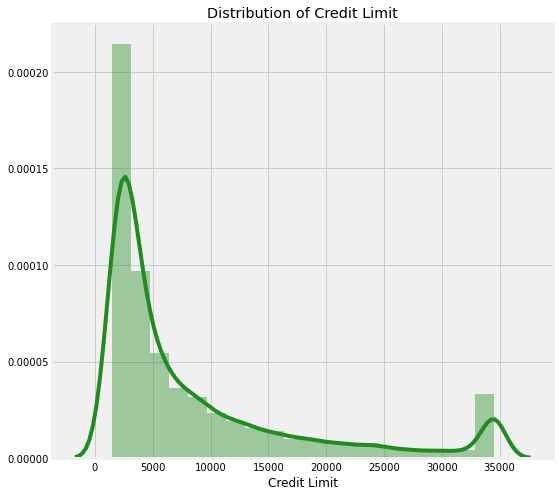

In [180]:
fig = plt.figure(figsize=(8,8))

sns.distplot(df['Credit_Limit'], color='forestgreen', bins=20)
plt.xlabel('Credit Limit')
plt.title('Distribution of Credit Limit')
plt.show()

In [181]:
df['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

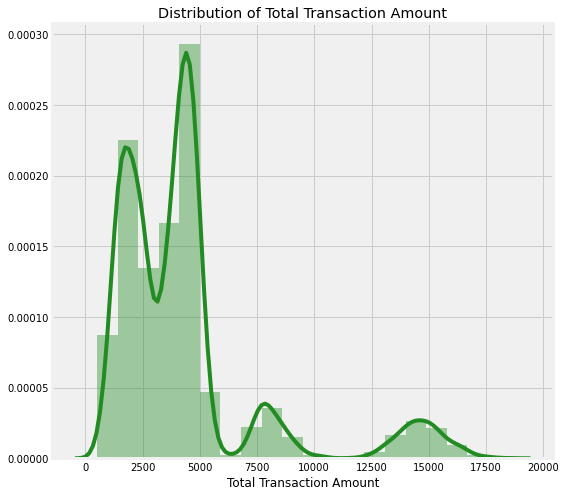

In [182]:
fig = plt.figure(figsize=(8,8))

sns.distplot(df['Total_Trans_Amt'], color='forestgreen', bins=20)
plt.xlabel('Total Transaction Amount')
plt.title('Distribution of Total Transaction Amount')
plt.show()

In [183]:
# binarize and encode categorical variables

categories = df.describe(include='object').columns

for category in categories:
    if len(df[category].unique()) == 2:
        lb = LabelBinarizer()
        df[category] = lb.fit_transform(df[category])
    else:
        le = LabelEncoder()
        df[category] = le.fit_transform(df[category])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [185]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [186]:
feature_cols = df.columns[1:]
feature_cols

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [187]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df['Attrition_Flag']))

X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Attrition_Flag']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'Attrition_Flag']

In [188]:
# scale variables

mm_train = MinMaxScaler()
X_train = mm_train.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_cols)

mm_test = MinMaxScaler()
X_test = mm_test.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_cols)

In [189]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (7088, 19)
X_test: (3039, 19)
y_train: (7088,)
y_test: (3039,)


In [190]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [191]:
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train, y_train)

In [192]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [193]:
lr_pred = lr.predict(X_test)

In [194]:
lr_accuracy = accuracy_score(lr_pred, y_test)
lr_precision = precision_score(lr_pred, y_test)
lr_recall = recall_score(lr_pred, y_test)
lr_f1 = f1_score(lr_pred, y_test)

model_list.append('Logistic Regression')
accuracy_list.append(lr_accuracy)
precision_list.append(lr_precision)
recall_list.append(lr_recall)
f1_list.append(lr_f1)

In [195]:
print(classification_report(lr_pred, y_test))
print('Accuracy:', accuracy_score(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61       314
           1       0.97      0.91      0.94      2725

   micro avg       0.90      0.90      0.90      3039
   macro avg       0.74      0.84      0.77      3039
weighted avg       0.92      0.90      0.91      3039

Accuracy: 0.8966765383349786


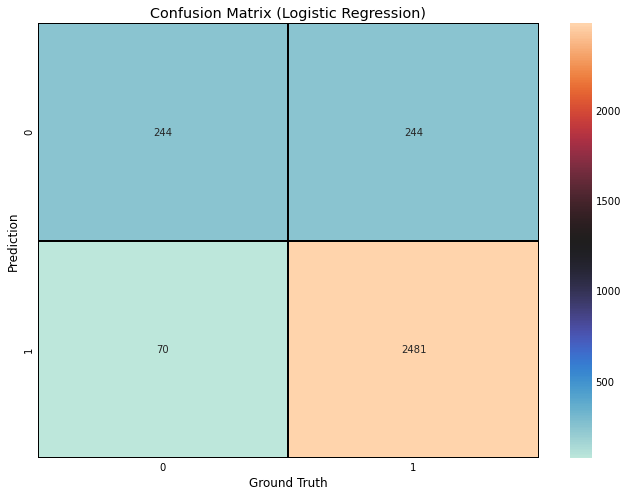

In [243]:
cm = confusion_matrix(y_test, lr_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

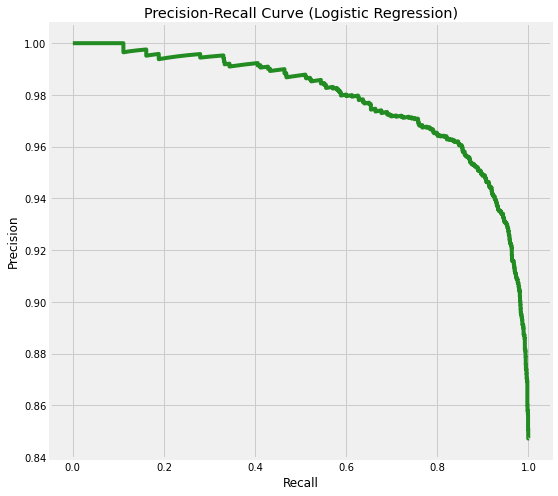

In [197]:
lr_prob = lr.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, lr_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.show()

In [198]:
from sklearn.linear_model import LogisticRegressionCV

In [199]:
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l1

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [200]:
pickle.dump(lr_l1, open('lr_l1_model.pkl', 'wb'))

In [201]:
lr_l1_pred = lr_l1.predict(X_test)

In [202]:
lr_l1_accuracy = accuracy_score(lr_l1_pred, y_test)
lr_l1_precision = precision_score(lr_l1_pred, y_test)
lr_l1_recall = recall_score(lr_l1_pred, y_test)
lr_l1_f1 = f1_score(lr_l1_pred, y_test)

model_list.append('Logistic Regression (L1)')
accuracy_list.append(lr_l1_accuracy)
precision_list.append(lr_l1_precision)
recall_list.append(lr_l1_recall)
f1_list.append(lr_l1_f1)

In [203]:
print(classification_report(lr_l1_pred, y_test))
print('Accuracy:', accuracy_score(lr_l1_pred, y_test))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       366
           1       0.96      0.92      0.94      2673

   micro avg       0.90      0.90      0.90      3039
   macro avg       0.76      0.84      0.79      3039
weighted avg       0.92      0.90      0.91      3039

Accuracy: 0.8999670944389602


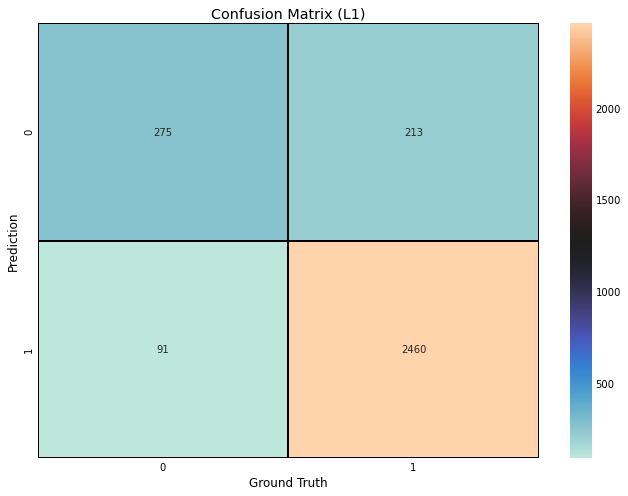

In [204]:
cm = confusion_matrix(y_test, lr_l1_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (L1)')
plt.show()

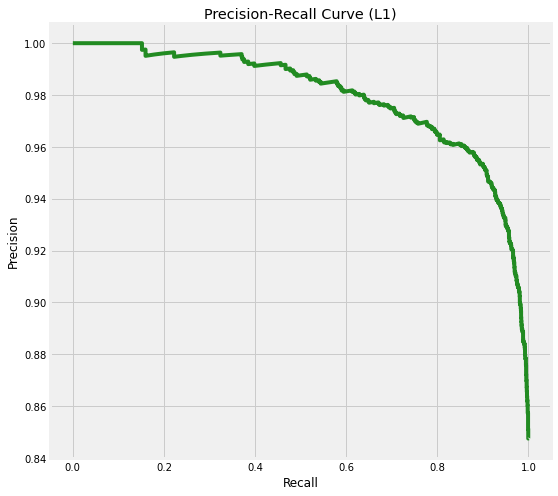

In [205]:
lr_l1_prob = lr_l1.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, lr_l1_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (L1)')
plt.show()

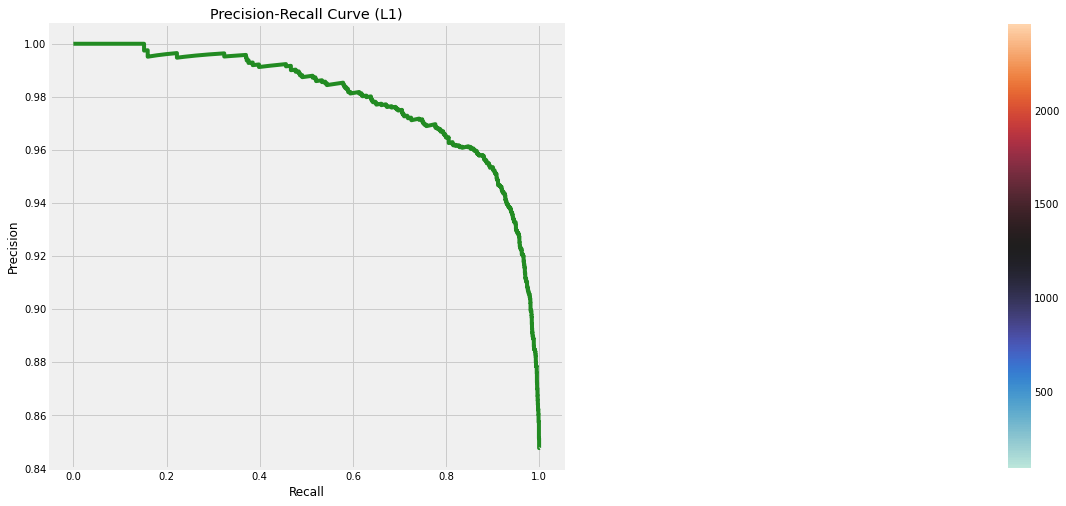

In [241]:
cm = confusion_matrix(y_test, lr_l1_pred)

lr_l1_prob = lr_l1.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, lr_l1_prob[:,1])

fig = plt.figure(figsize=(18, 18))

plt.subplot(211)
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (L1)')

plt.subplot(221)
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (L1)')

plt.show()



In [206]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
lr_l2

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [207]:
pickle.dump(lr_l2, open('lr_l2_model.pkl', 'wb'))

In [208]:
lr_l2_pred = lr_l2.predict(X_test)

In [209]:
lr_l2_accuracy = accuracy_score(lr_l2_pred, y_test)
lr_l2_precision = precision_score(lr_l2_pred, y_test)
lr_l2_recall = recall_score(lr_l2_pred, y_test)
lr_l2_f1 = f1_score(lr_l2_pred, y_test)

model_list.append('Logistic Regression (L2)')
accuracy_list.append(lr_l2_accuracy)
precision_list.append(lr_l2_precision)
recall_list.append(lr_l2_recall)
f1_list.append(lr_l2_f1)

In [210]:
print(classification_report(lr_l2_pred, y_test))
print('Accuracy:', accuracy_score(lr_l2_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.76      0.62       342
           1       0.97      0.92      0.94      2697

   micro avg       0.90      0.90      0.90      3039
   macro avg       0.75      0.84      0.78      3039
weighted avg       0.92      0.90      0.90      3039

Accuracy: 0.8973346495557749


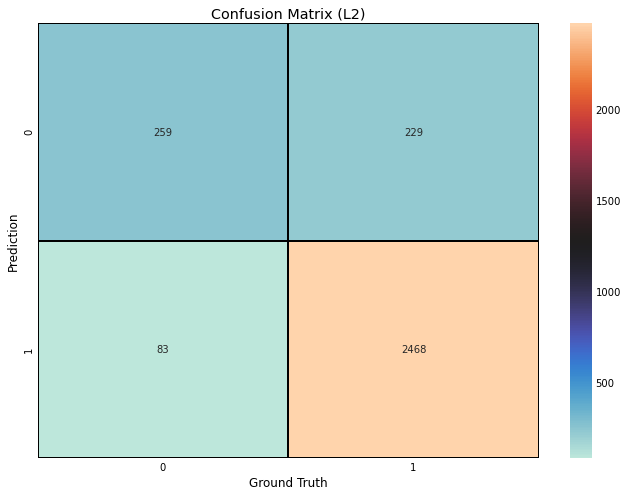

In [211]:
cm = confusion_matrix(y_test, lr_l2_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (L2)')
plt.show()

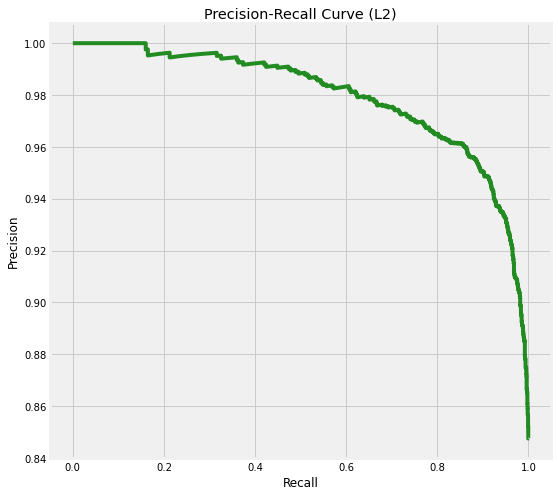

In [212]:
lr_l2_prob = lr_l2.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, lr_l2_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (L2)')
plt.show()

In [213]:
svc = SVC(kernel='rbf', gamma=10, C=10.0, probability=True)
svc = svc.fit(X_train, y_train)
param_grid = {'gamma': [.5, 1, 2, 5, 10, 20]}
svc = GridSearchCV(svc, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
svc = svc.fit(X_train, y_train)
svc.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [214]:
pickle.dump(svc, open('svc_model.pkl', 'wb'))

In [215]:
svc_pred = svc.predict(X_test)

In [216]:
svc_accuracy = accuracy_score(svc_pred, y_test)
svc_precision = precision_score(svc_pred, y_test)
svc_recall = recall_score(svc_pred, y_test)
svc_f1 = f1_score(svc_pred, y_test)

model_list.append('Support Vector Classifier')
accuracy_list.append(svc_accuracy)
precision_list.append(svc_precision)
recall_list.append(svc_recall)
f1_list.append(svc_f1)

In [217]:
print(classification_report(svc_pred, y_test))
print('Accuracy:', accuracy_score(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       436
           1       0.97      0.95      0.96      2603

   micro avg       0.93      0.93      0.93      3039
   macro avg       0.85      0.88      0.86      3039
weighted avg       0.93      0.93      0.93      3039

Accuracy: 0.928923988153998


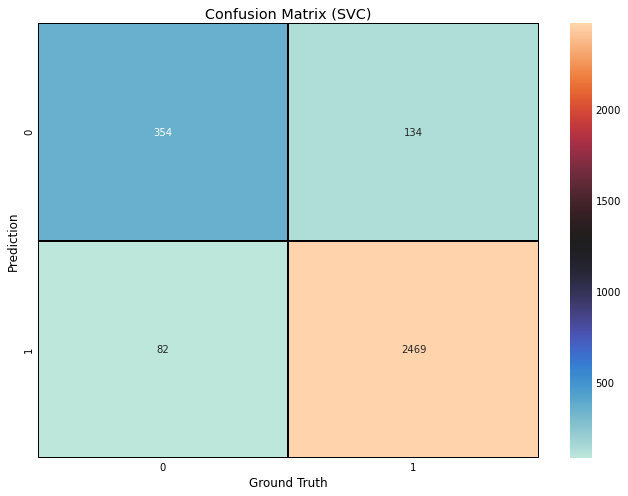

In [244]:
cm = confusion_matrix(y_test, svc_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (SVC)')
plt.show()

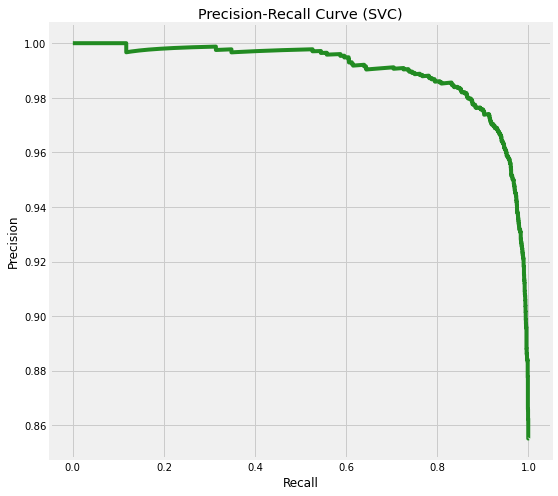

In [219]:
svc_prob = svc.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, svc_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVC)')
plt.show()

In [220]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.iloc[X_color.index]
    y_color = y_color.map(lambda x: 'yellow' if x == 1 else 'red')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

In [221]:
rc = RandomForestClassifier(n_estimators=50)
rc = rc.fit(X_train, y_train)
estimator_list = [25, 50, 100, 125]
param_grid = {'n_estimators': estimator_list, 'criterion': ['gini', 'entropy']}
rc = GridSearchCV(rc, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
rc.fit(X_train, y_train)
rc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
pickle.dump(rc, open('rc_model.pkl', 'wb'))

In [223]:
rc_pred = rc.predict(X_test)

In [224]:
rc_accuracy = accuracy_score(rc_pred, y_test)
rc_precision = precision_score(rc_pred, y_test)
rc_recall = recall_score(rc_pred, y_test)
rc_f1 = f1_score(rc_pred, y_test)

model_list.append('Random Forest')
accuracy_list.append(rc_accuracy)
precision_list.append(rc_precision)
recall_list.append(rc_recall)
f1_list.append(rc_f1)

In [225]:
print(classification_report(rc_pred, y_test))
print('Accuracy:', accuracy_score(rc_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       433
           1       0.99      0.96      0.97      2606

   micro avg       0.96      0.96      0.96      3039
   macro avg       0.90      0.94      0.92      3039
weighted avg       0.96      0.96      0.96      3039

Accuracy: 0.9575518262586377


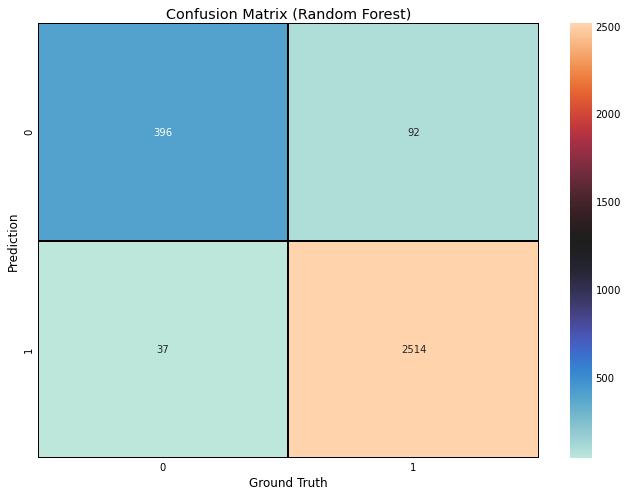

In [226]:
cm = confusion_matrix(y_test, rc_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

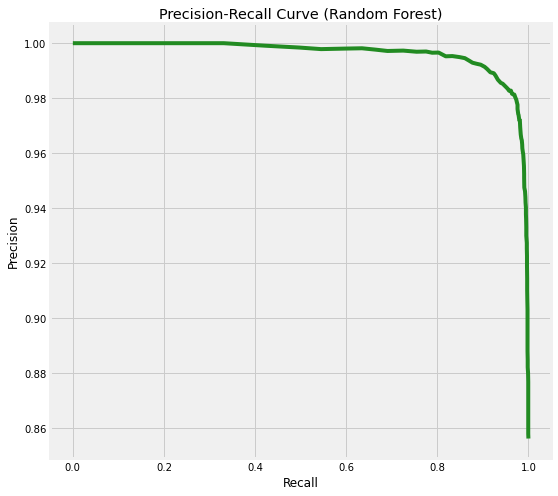

In [227]:
rc_prob = rc.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, rc_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.show()

In [228]:
classifiers = [('LR_L1', lr_l1), ('SVC', svc), ('RC', rc)]
vc = VotingClassifier(classifiers, voting='soft')
vc = vc.fit(X_train, y_train)

In [229]:
pickle.dump(vc, open('voting_model.pkl', 'wb'))

In [230]:
vc_pred = vc.predict(X_test)

In [231]:
vc_accuracy = accuracy_score(vc_pred, y_test)
vc_precision = precision_score(vc_pred, y_test)
vc_recall = recall_score(vc_pred, y_test)
vc_f1 = f1_score(vc_pred, y_test)

model_list.append('Voting Classifier')
accuracy_list.append(vc_accuracy)
precision_list.append(vc_precision)
recall_list.append(vc_recall)
f1_list.append(vc_f1)

In [232]:
print(classification_report(vc_pred, y_test))
print('Accuracy:', accuracy_score(vc_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       389
           1       0.98      0.94      0.96      2650

   micro avg       0.93      0.93      0.93      3039
   macro avg       0.84      0.91      0.87      3039
weighted avg       0.94      0.93      0.94      3039

Accuracy: 0.9338598223099703


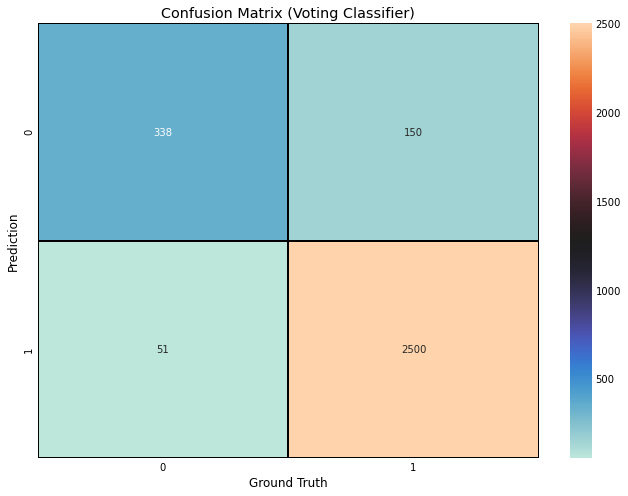

In [233]:
cm = confusion_matrix(y_test, vc_pred)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='icefire', linecolor='black', linewidths=1, fmt='d')
labels = ['False', 'True']
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Voting Classifier)')
plt.show()

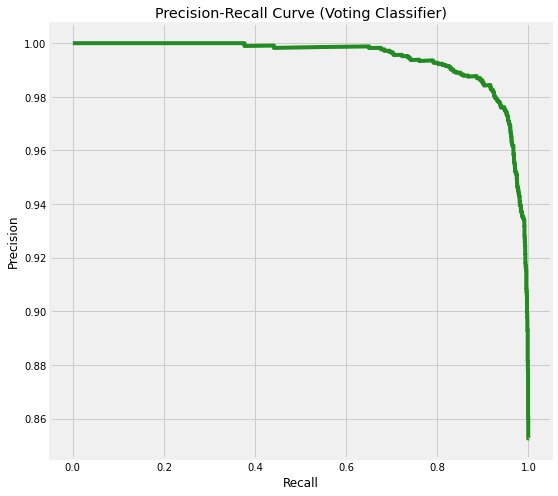

In [234]:
vc_prob = vc.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, vc_prob[:,1])

fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Voting Classifier)')
plt.show()

In [235]:
data = {'model': model_list, 'accuracy': accuracy_list, 'precision': precision_list, 'recall': recall_list, 'f1': f1_list}
df_scores = pd.DataFrame(data, columns=['model', 'accuracy', 'precision', 'recall', 'f1'])
df_scores = df_scores.T
df_scores

,0,1,2,3,4,5
model,Logistic Regression,Logistic Regression (L1),Logistic Regression (L2),Support Vector Classifier,Random Forest,Voting Classifier
accuracy,0.896677,0.899967,0.897335,0.928924,0.957552,0.93386
precision,0.97256,0.964328,0.967464,0.967856,0.985496,0.980008
recall,0.910459,0.920314,0.915091,0.948521,0.964697,0.943396
f1,0.940485,0.941807,0.940549,0.958091,0.974985,0.961354


In [236]:
import dataframe_image as dfi

dfi.export(df_scores, 'classificaiton_scores.png')